In [11]:
### Pick the file directory
FILES_DIR = '/media/ab/data/Research_Data/EnhancerDist/'
OUTPUT_DIR = '/media/ab/data/Research_Data/EnhancerDist/'

tss_regions 64534
Input directory is:  /media/ab/data/Research_Data/EnhancerDist/
length of this data:  8061

8061
1455
comp_bed[0]:  chr1	3471606	3472008
chr1	4802971	4804422
chr1	4805598	4806730
chr1	4835688	4836132
chr1	5054042	5054371
chr1	5105660	5105831
chr1	5119363	5120103
chr1	5121813	5121951
chr1	5122456	5122679
chr1	5129167	5130031
chr1	5225299	5226874
chr1	5521066	5521437
chr1	7608609	7608913
chr1	7912697	7912817
chr1	7926797	7927599
chr1	8004009	8005804
chr1	8022817	8023968
chr1	8083652	8084223
chr1	8166553	8166973
chr1	8167738	8168195
chr1	8438518	8440409
chr1	8460105	8460259
chr1	8463626	8463780
chr1	8561587	8562001
chr1	8562976	8563217
chr1	8566876	8567185
chr1	8567709	8568675
chr1	8572545	8572813
chr1	8660532	8661912
chr1	8670567	8670772
chr1	8703654	8703858
chr1	8764111	8764721
chr1	8822501	8822889
chr1	8873741	8873994
chr1	8908546	8909185
chr1	8913808	8915240
chr1	9311218	9311343
chr1	9311923	9312076
chr1	9319629	9320800
chr1	11312102	11312287
chr1	11563329	11563504
c

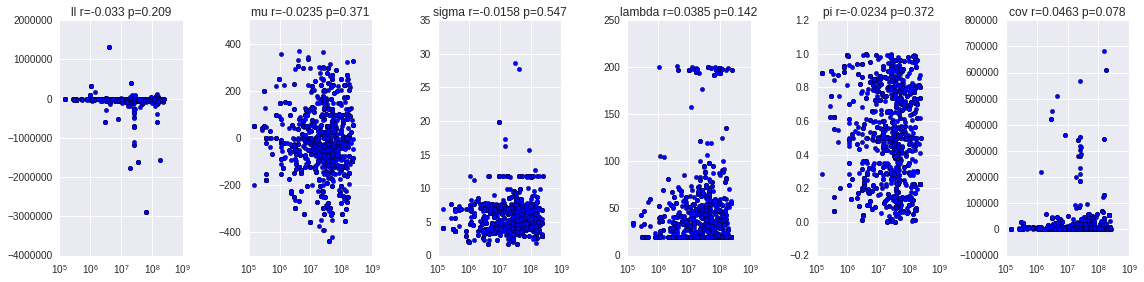

comp_bed[0]:  chr1	4802971	4804422
chr1	4835688	4836132
chr1	5119363	5120103
chr1	5225299	5226874
chr1	8004009	8005804
chr1	8022817	8023968
chr1	8166553	8166973
chr1	8167738	8168195
chr1	8438518	8440409
chr1	8567709	8568675
chr1	8670567	8670772
chr1	8913808	8915240
chr1	9311923	9312076
chr1	9319629	9320800
chr1	11563329	11563504
chr1	12048831	12050327
chr1	12510313	12510888
chr1	14626391	14628402
chr1	14682460	14683876
chr1	14686538	14687339
chr1	14726043	14726707
chr1	14782901	14783352
chr1	16114658	16117284
chr1	16639029	16639514
chr1	17469001	17469445
chr1	18091062	18091400
chr1	18495646	18498397
chr1	18542910	18543185
chr1	18721982	18722908
chr1	19363917	19364168
chr1	19366506	19367432
chr1	20279088	20279264
chr1	21308619	21308837
chr1	21320706	21321617
chr1	22154438	22155375
chr1	22441476	22445868
chr1	22489171	22490663
chr1	22497724	22499548
chr1	22685171	22685367
chr1	23374066	23374835
chr1	23561820	23562332
chr1	23596408	23599845
chr1	24179584	24180099
chr1	24524889	24525984
ch

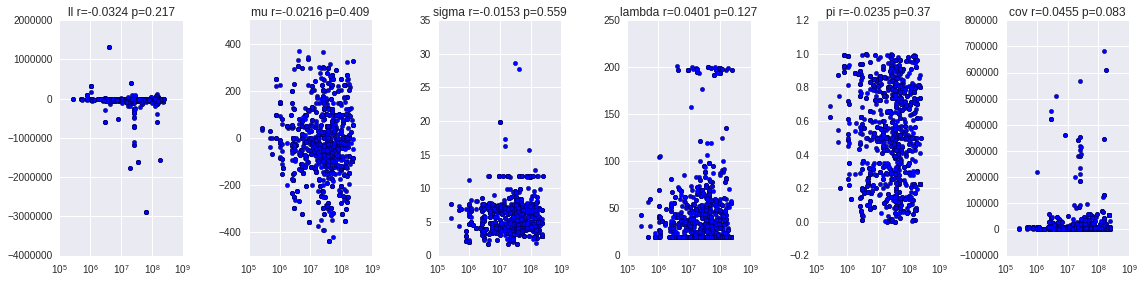

comp_bed[0]:  chr1	3471606	3472008
chr1	4805598	4806730
chr1	5054042	5054371
chr1	5105660	5105831
chr1	5121813	5121951
chr1	5122456	5122679
chr1	5129167	5130031
chr1	5521066	5521437
chr1	7608609	7608913
chr1	7912697	7912817
chr1	7926797	7927599
chr1	8083652	8084223
chr1	8460105	8460259
chr1	8463626	8463780
chr1	8561587	8562001
chr1	8562976	8563217
chr1	8566876	8567185
chr1	8572545	8572813
chr1	8660532	8661912
chr1	8703654	8703858
chr1	8764111	8764721
chr1	8822501	8822889
chr1	8873741	8873994
chr1	8908546	8909185
chr1	9311218	9311343
chr1	11312102	11312287
chr1	11876366	11876600
chr1	11931049	11931277
chr1	14650754	14651430
chr1	14767471	14767885
chr1	15140261	15140383
chr1	15197050	15197238
chr1	15402619	15403458
chr1	15593345	15594027
chr1	15676674	15677721
chr1	15802479	15802826
chr1	15803713	15803884
chr1	15834433	15836382
chr1	16146568	16146973
chr1	16167095	16167606
chr1	16499409	16499857
chr1	16903877	16904015
chr1	16904959	16905893
chr1	17063765	17063930
chr1	17469999	17470684
c

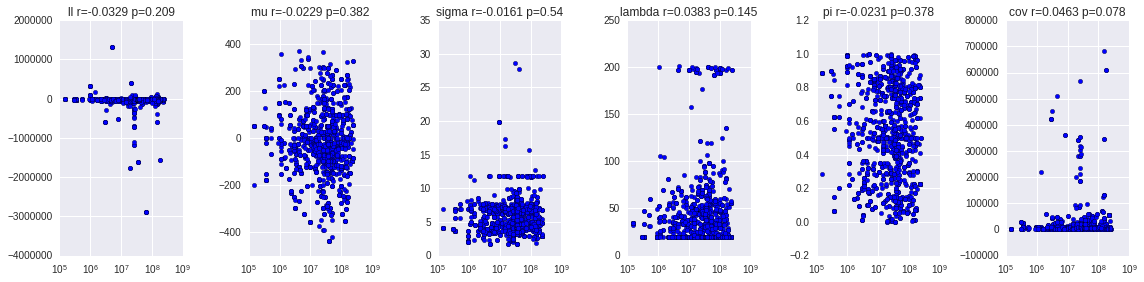

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [34]:
### This code converts the TSV file output by Tfit into a single line flat file and allows it to be filtered by
### 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from pybedtools import BedTool
import csv
import scipy
import sys
import math
from scipy import stats
import matplotlib.ticker as mtick
import seaborn

file_filter = "SRR1145801_Model-1_K_models_MLE.full.tsv"
### Initiate lists of variables for later use
intervals = ['ac.peaks.sorted.merged500bp.NoTSS1kb.bed', 
             'ac.peaks.sorted.merged500bp.NoTSS1kb.NearMe1.bed', 
             'ac.peaks.sorted.merged500bp.NoTSS1kb.NoMe1.bed']
TSS_regions = BedTool(FILES_DIR+'hg38.refseqTSS.2Kbp.bed')
print 'tss_regions', len(TSS_regions)
all_mu = []
all_sigma = []
all_pi = []
all_lambda_= []
all_data = dict()
def main():  
    directory = FILES_DIR
    print "Input directory is: ", directory
    dir_list = sorted(os.listdir(directory))
    for filename in dir_list:
        if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
            all_data[filename] = load_from_file(directory+filename)
            print "length of this data: ", len(all_data[filename])
            #print "data: ", all_data[filename]
    #print "Histograms for the statistics of each dataset"
    #print "- mu is normalized to middle of interval - a negative value indicates mu is upstream of the middle"
    #print "- square root of lambda is graphed"
    
    bed_list = load_beds(directory, intervals)
    
    for key in sorted(all_data.keys()):      
        bidir_bed = BedTool(all_data[key]).sort()
        print len(bidir_bed)
        bidir_bed = bidir_bed.intersect(TSS_regions, v=False).sort()
        print len(bidir_bed)
        save_output(directory, key, bidir_bed)    
        for comp_bed in bed_list:
            output = bidir_bed.closest(comp_bed[1], d=True)
            print "comp_bed[0]: ", comp_bed[1]
            ll_corr_data = []
            mu_corr_data = []
            sigma_corr_data = []
            lambda_corr_data = []
            pi_corr_data = []
            distance_data = []
            cov_corr_data = []
            for line in output:     
                if int(line[12])>0:
                    distance_data.append(int(line[12]))
                    ll_corr_data.append(float(line[4]))
                    mu_corr_data.append(float(line[5]))
                    sigma_corr_data.append(float(line[6]))
                    lambda_corr_data.append(float(line[7]))
                    pi_corr_data.append(float(line[8]))
                    cov_corr_data.append(float(line[9]))

                else:
                    #distance_data.append(-1*math.log(-1*int(line[12]), 10))
                    print "Value less than 0"
            #print (ll_corr_data)
            #print "distance data: ", len(distance_data), sorted(distance_data)
            make_scatters(key,
                          directory,
                          comp_bed[0],
                          distance_data,
                          ll_corr_data, 
                          mu_corr_data, 
                          sigma_corr_data, 
                          lambda_corr_data,
                          pi_corr_data,
                          cov_corr_data)    
                
                #print "key: ", key
                #log_likelihood, mu, sigma, lambda_, pi = get_data_for_graphs(all_data[key])
                #make_graphs(key, mu, sigma, lambda_, log_likelihood, pi)
                #print all_data[key]
                #print BedTool(all_data[key])
                
                #print len(BedTool(all_data[key]))

def make_scatters(key, directory, marks, distance_data, ll_corr_data, 
                  mu_corr_data, sigma_corr_data, lambda_corr_data, pi_corr_data, cov_corr_data):

    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(16, 4))
    print key, marks

    ax1.scatter(distance_data, ll_corr_data)
    ax1.set_title('ll'+' '+'r='+str(round(stats.pearsonr(distance_data, ll_corr_data)[0],4))
                  +' p='+str(round(stats.pearsonr(distance_data, ll_corr_data)[1],3)))
    #start, end = ax1.get_xlim()
    #ax1.xaxis.set_ticks(np.arange(start, end, 1))
    #ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%0.0e'))
    #ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
    #major_ticks = np.arange(0, 12, 2)                                              
    #ax1.set_xticks(major_ticks)   
    #ax1.set_xscale("log", subsx=None)

    ax2.scatter(distance_data, mu_corr_data)
    ax2.set_title('mu'+' '+'r='+str(round(stats.pearsonr(distance_data, mu_corr_data)[0],4))
                 +' p='+str(round(stats.pearsonr(distance_data, mu_corr_data)[1],3)))
    ax3.scatter(distance_data, sigma_corr_data)
    ax3.set_title('sigma'+' '+'r='+str(round(stats.pearsonr(distance_data, sigma_corr_data)[0],4))
                 +' p='+str(round(stats.pearsonr(distance_data, sigma_corr_data)[1],3)))
    ax4.scatter(distance_data, lambda_corr_data)
    ax4.set_title('lambda'+' '+'r='+str(round(stats.pearsonr(distance_data, lambda_corr_data)[0],4))
                 +' p='+str(round(stats.pearsonr(distance_data, lambda_corr_data)[1],3)))
    ax5.scatter(distance_data, pi_corr_data)
    ax5.set_title('pi'+' '+'r='+str(round(stats.pearsonr(distance_data, pi_corr_data)[0],4))
                 +' p='+str(round(stats.pearsonr(distance_data, pi_corr_data)[1],3)))
    ax6.scatter(distance_data, cov_corr_data)
    ax6.set_title('cov'+' '+'r='+str(round(stats.pearsonr(distance_data, cov_corr_data)[0],4))
                 +' p='+str(round(stats.pearsonr(distance_data, cov_corr_data)[1],3)))
    ax1.set_xscale("log", subsx=None)
    ax2.set_xscale("log", subsx=None)
    ax3.set_xscale("log", subsx=None)
    ax4.set_xscale("log", subsx=None)
    ax5.set_xscale("log", subsx=None)
    ax6.set_xscale("log", subsx=None)

    
    #start, end = ax1.get_xlim()
    #ax1.xaxis.set_ticks(np.arange(start, end, 1))
    #ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    ### Set the layout and show the plot
    plt.savefig(directory+key+"_"+marks+"_scatters.svg",format='svg')
    plt.savefig(directory+key+"_"+marks+"_scatters.png",format='png')
    plt.tight_layout()
    plt.show()
                  
                  
def load_beds(directory, intervals):
    
    bed_list = []
    for i in intervals:
        bed_list.append((i,BedTool(directory+i).sort()))
    print 
    return bed_list


def save_output(directory, name, data):

    # Save the line data to an output text file in the same directory as
    # the graphs

    # Create writer
    ofile  = open(directory+name+".bed", "wb")
    writer = csv.writer(ofile, delimiter='\t')
    
    # Create headers
    headers = ['#chr', 'start', 'end', 'name', 'log-likelihood', 'mu', 'sigma', 'lambda',  'pi']
    

    writer.writerow(headers)
    for line in data:
        writer.writerow([line[0], line[1], line[2], line[3], line[4], line[5], line[6], line[7], line[8]])
        #writer.writerow((graph_data[group][3][point],group,graph_data[group][0][point],
        #                graph_data[group][1][point],
        #                graph_data[group][2][point]
        #                ))
    writer.writerow('')

    # Close the file
    ofile.close()
    return        
        
def load_from_file(file_to_open):    

    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    position = ['', '', '', '', '', '', '', '', '',''] ### Initate the dict for each genomic interval
    for line in x:               ### For each line in the file x
        if line[0] == '>':       ### Look for indicator of new interval
            position[0] = str((line.split('|')[1]).split(':')[0].strip('\n'))   ### chromosome
            position[1] = str(((line.split('|')[1]).split(':')[1]).split('-')[0].strip('\n')) ### Start position
            position[2] = str(((line.split('|')[1]).split(':')[1]).split('-')[1].strip('\n'))  ### End position
            position[3] = str(line.split('|')[0][1:].strip('\n'))   ### interval name
            position[9] = str(max([line.split('|')[2].strip('\n').split(',')[0], 
                                   line.split('|')[2].strip('\n').split(',')[1]]))
            middle = np.mean([    int( position[1] ), int( position[2] ) ])
        if line[0] == '~' and line[1] == '1':   ### Look for indicator of model 1
            position[4] = str(inf_to_zero((line.split('\t')[0]).split(',')[1].strip('\n')))  # log-likelihood
            position[5] = str(int(float((line.split('\t')[1].strip('\n'))) - middle))			# mu
            position[6] = str(np.sqrt(float(inf_to_zero(line.split('\t')[2].strip('\n')))))			# sigma
            position[7] = str(inf_to_zero(line.split('\t')[3].strip('\n')))			# lambda
            position[8] = str(inf_to_zero(line.split('\t')[4].strip('\n')))			# pi
            data.append(position)               ### Append the interval dict to the data list                
            position = ['', '', '', '', '', '', '', '', '','']                   ### Reset the position
    x.close()
    return data            
        
def get_data_for_graphs(data):              
    lambda_ = []                 ### Init the list of all lambda values
    sigma = []                   ### Init the list of all sigma values
    mu = []                      ### Init the list of all mu values
    log_likelihood = []          ### Init the list of all log_likelihood values
    pi = []                      ### Init the list of all pi values
    cov_max = []
    for position in data:               ### For each interval, copy the statistics to a separate list
        lambda_.append(float(position[7]))
        sigma.append(float(position[6]))
        mu.append(float(position[5]))
        log_likelihood.append(float(position[4]))
        pi.append(float(position[8]))
        cov_max.append(float(max([int(positon[9][0]), float(positon[9][1])])))
        #mu_pi.append((float(position['model_1']['mu_k']), float(position['model_1']['pi_k'])))
    
    return (log_likelihood, mu, sigma, lambda_, pi, cov_max)
     

def inf_to_zero(value):
    if (float(value) == float('inf')) or (-float(value) == float('inf')):
        #print "inf removed", value
        return 0
    else:
        return value

if __name__ == "__main__":
    sys.exit(main())